### Initial Imports and Data Analysis

In [20]:
#Necessary imports for analysis
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
import yfinance as yf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

#Confirm that the correct environment is being used
import sys
print(sys.executable)

#Some of yfinance's uses deprecated commands internally
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Bjorn\anaconda3\envs\fintech\python.exe


In [21]:
nvda = yf.Ticker("NVDA")

In [22]:
hist = nvda.history(period="10y")

In [23]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-06 00:00:00-05:00,0.491304,0.497064,0.487464,0.489624,210524000,0.0,0.0
2015-02-09 00:00:00-05:00,0.486744,0.490584,0.483624,0.489144,273944000,0.0,0.0
2015-02-10 00:00:00-05:00,0.489624,0.503065,0.487464,0.502825,226204000,0.0,0.0
2015-02-11 00:00:00-05:00,0.504025,0.504025,0.496104,0.499464,320832000,0.0,0.0
2015-02-12 00:00:00-05:00,0.528026,0.540026,0.524906,0.535226,676904000,0.0,0.0


In [24]:
#Extract what I believe to be relevant data
rel_subset = hist[["Open", "Close", "High", "Low", "Volume"]]

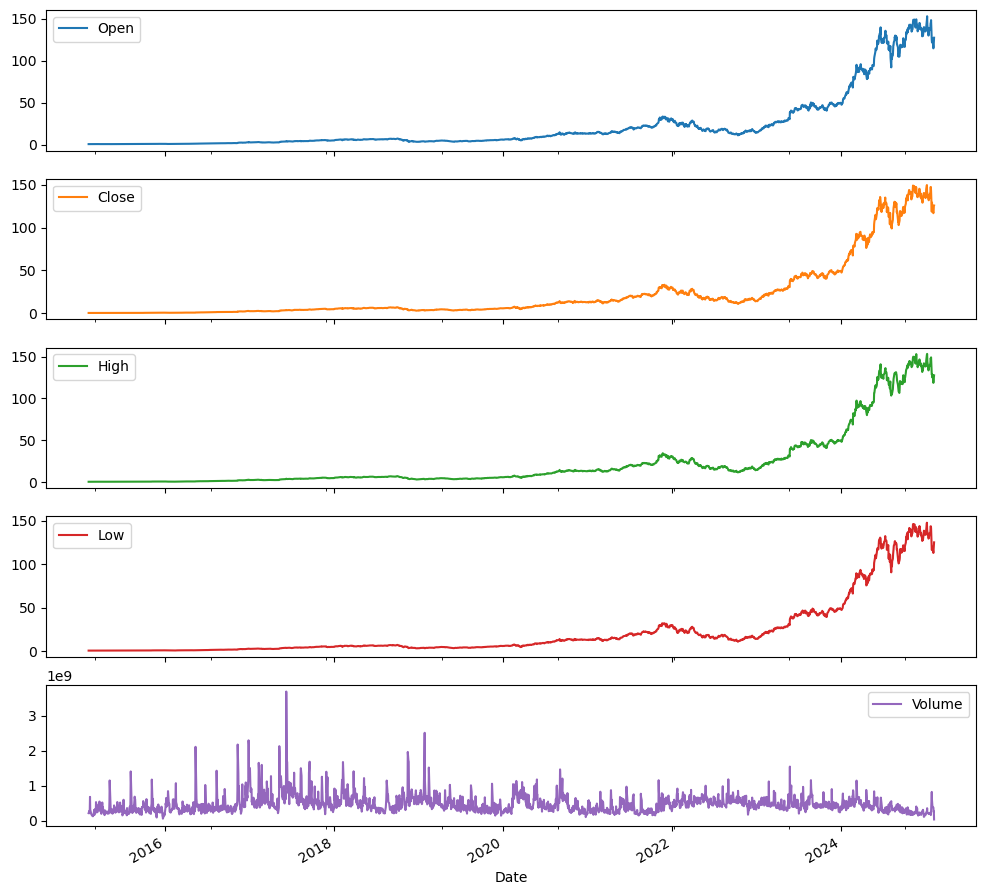

In [25]:
rel_subset.plot(kind="line", figsize = (12,12), subplots = True);

Right now, we're going to train on all the available data, except for the action data (stock splits, and dividends). First, we need to generate labels.

In [26]:
hist["TomorrowOpenPrice"] = hist["Open"].shift(-1)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,TomorrowOpenPrice
Date,,,,,,,,
2015-02-06 00:00:00-05:00,0.491304,0.497064,0.487464,0.489624,210524000,0.0,0.0,0.486744
2015-02-09 00:00:00-05:00,0.486744,0.490584,0.483624,0.489144,273944000,0.0,0.0,0.489624
2015-02-10 00:00:00-05:00,0.489624,0.503065,0.487464,0.502825,226204000,0.0,0.0,0.504025
2015-02-11 00:00:00-05:00,0.504025,0.504025,0.496104,0.499464,320832000,0.0,0.0,0.528026
2015-02-12 00:00:00-05:00,0.528026,0.540026,0.524906,0.535226,676904000,0.0,0.0,0.534026


In [27]:
developed_labels = (hist["TomorrowOpenPrice"] > hist["Close"]).astype(int)
hist["Labels"] = developed_labels
print(hist.head())
print(hist.tail())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2015-02-06 00:00:00-05:00  0.491304  0.497064  0.487464  0.489624  210524000   
2015-02-09 00:00:00-05:00  0.486744  0.490584  0.483624  0.489144  273944000   
2015-02-10 00:00:00-05:00  0.489624  0.503065  0.487464  0.502825  226204000   
2015-02-11 00:00:00-05:00  0.504025  0.504025  0.496104  0.499464  320832000   
2015-02-12 00:00:00-05:00  0.528026  0.540026  0.524906  0.535226  676904000   

                           Dividends  Stock Splits  TomorrowOpenPrice  Labels  
Date                                                                           
2015-02-06 00:00:00-05:00        0.0           0.0           0.486744       0  
2015-02-09 00:00:00-05:00        0.0           0.0           0.489624       1  
2015-02-10 00:00:00-05:00        0.0           0.0           0.504025       1  
2015-02-11 00:00:00-05:00        0.0   

In [28]:
# Official Develop features and labels
features = hist[["Open", "High", "Low", "Close", "Volume"]] # For now assume that all non-action (stock splits and dividends) data is relevant
labels = hist["Labels"]

#Remove NaN points
features = features.dropna()
labels = labels.dropna()

In [29]:
# No shuffle since this is time series data
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(features, labels, test_size=0.3, shuffle=False)

In [30]:
rf_a1 = sk.ensemble.RandomForestClassifier(n_estimators=20,random_state=23) 
rf_a1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=23)

In [31]:
# Metric Analsyis
y_pred_test_a1 = rf_a1.predict(X_test)
y_pred_train_a1 = rf_a1.predict(X_train)

acc_train_a1 = accuracy_score(y_train, y_pred_train_a1)
acc_test_a1 = accuracy_score(y_test, y_pred_test_a1)

confmat_train_a1 = confusion_matrix(y_train, y_pred_train_a1)
confmat_test_a1 = confusion_matrix(y_test, y_pred_test_a1)

precscor_test_a1 = precision_score(y_test, y_pred_test_a1)
precscor_train_a1 = precision_score(y_train, y_pred_train_a1)

In [32]:
print(f'Train Data Accuracy: {acc_train_a1}')
print(f'Train Data Confusion Matrix: {confmat_train_a1}')
print(f'Train Data Precision Score: {precscor_train_a1}')

print('\n')
print(f'Test Data Accuracy: {acc_test_a1}')
print(f'Test Data Confusion Matrix: {confmat_test_a1}')
print(f'test Data Precision Score: {precscor_test_a1}')


Train Data Accuracy: 0.9937535491198183
Train Data Confusion Matrix: [[ 713    7]
 [   4 1037]]
Train Data Precision Score: 0.9932950191570882


Test Data Accuracy: 0.4357615894039735
Test Data Confusion Matrix: [[247 107]
 [319  82]]
test Data Precision Score: 0.43386243386243384


Clearly overfitting the training set. Reducing the number of trees just leads to worse performance overall, and adding more trees simply overfits the data more

### Include Feature Engineering

https://medium.com/@jasonbamford/machine-learning-algorithm-to-predict-stock-direction-d54b7666cc7c

In [33]:
hist["Return"] = hist["Close"].pct_change()
hist["Close_MovingAvg"] = hist["Close"].rolling(window=18).mean()
# hist = hist.fillna(hist.median())

In [34]:
# Official Develop features and labels
features2 = hist[["Open", "High", "Low", "Close", "Volume", "Return","Close_MovingAvg"]]
labels2 = hist["Labels"]

# #Remove NaN points
# features = features.dropna()
# labels = labels.dropna()

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(features2, labels2, test_size=0.3, shuffle=False)

In [35]:
rf_a2 = sk.ensemble.RandomForestClassifier(n_estimators=20,random_state=23) 
rf_a2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=23)

In [36]:
# Metric Analsyis
y_pred_test_a2 = rf_a2.predict(X_test)
y_pred_train_a2 = rf_a2.predict(X_train)

acc_train_a2 = accuracy_score(y_train, y_pred_train_a2)
acc_test_a2 = accuracy_score(y_test, y_pred_test_a2)

confmat_train_a2 = confusion_matrix(y_train, y_pred_train_a2)
confmat_test_a2 = confusion_matrix(y_test, y_pred_test_a2)

precscor_test_a2 = precision_score(y_test, y_pred_test_a2)
precscor_train_a2 = precision_score(y_train, y_pred_train_a2)

In [37]:
print(f'Train Data Accuracy: {acc_train_a2}')
print(f'Train Data Confusion Matrix: {confmat_train_a2}')
print(f'Train Data Precision Score: {precscor_train_a2}')

print('\n')
print(f'Test Data Accuracy: {acc_test_a2}')
print(f'Test Data Confusion Matrix: {confmat_test_a2}')
print(f'test Data Precision Score: {precscor_test_a2}')


Train Data Accuracy: 0.9960249858035207
Train Data Confusion Matrix: [[ 716    4]
 [   3 1038]]
Train Data Precision Score: 0.9961612284069098


Test Data Accuracy: 0.49271523178807947
Test Data Confusion Matrix: [[148 206]
 [177 224]]
test Data Precision Score: 0.5209302325581395


Feature Engineering has only partially improved the model, perhaps it is necessary to test a different architecture.

In [38]:
#Check for class imbalance as a possible cause:
print(hist["Labels"].value_counts())

Labels
1    1442
0    1074
Name: count, dtype: int64
